In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("sbi life insurance.csv")
df.head(10)

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
5,31,0,25.740,0,0,2,3756.62160,0
6,46,0,33.440,1,0,2,8240.58960,1
7,37,0,27.740,3,0,1,7281.50560,0
8,37,1,29.830,2,0,0,6406.41070,0
9,60,0,25.840,0,0,1,28923.13692,0


In [3]:
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

Text(0.5, 0, 'bmi')

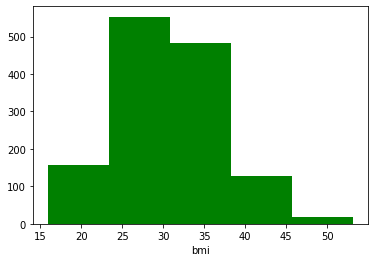

In [5]:
x=df['bmi']

plt.figsize=(10,18)
plt.hist(x,bins=5,color='green')
plt.xlabel('bmi')



In [6]:
df['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

Text(0.5, 1.0, 'children vs charges')

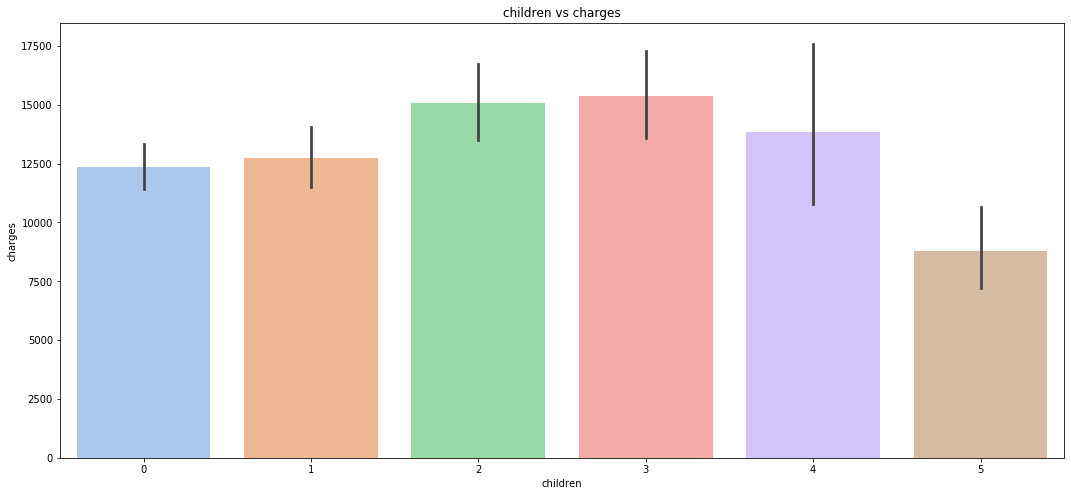

In [7]:
plt.figure(figsize = (18, 8))
sns.barplot(x = 'children', y = 'charges', data = df, palette ='pastel')

plt.title('children vs charges')

Text(0.5, 0, '0=non smoker  ,  1=smoker')

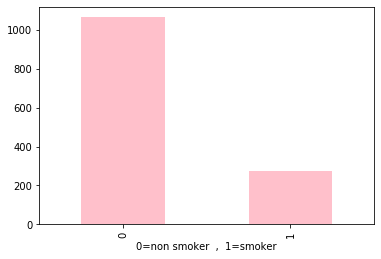

In [8]:
df['smoker'].value_counts().plot.bar(color = 'pink')
plt.xlabel('0=non smoker  ,  1=smoker')



Text(0.5, 1.0, 'region vs charges')

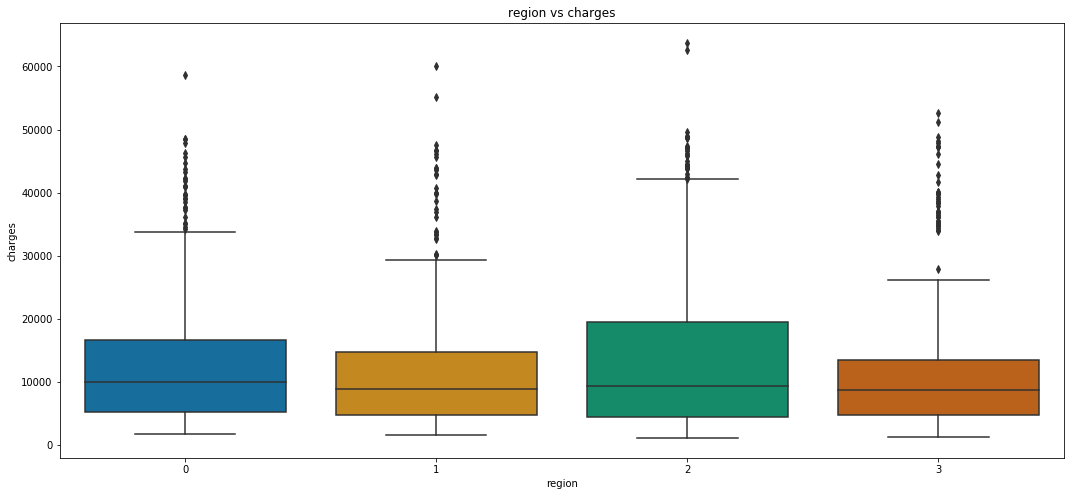

In [9]:
plt.figure(figsize = (18, 8))
sns.boxplot(x = 'region', y = 'charges', data = df, palette = 'colorblind')

plt.title('region vs charges')

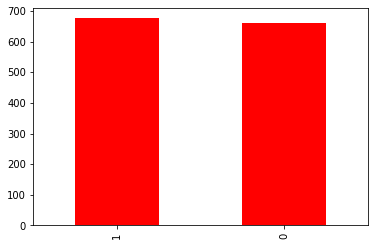

In [10]:
df['sex'].value_counts().plot.bar(color = 'red')

In [11]:
df.groupby('sex')['charges'].mean()

sex
0    12569.578844
1    13956.751178
Name: charges, dtype: float64

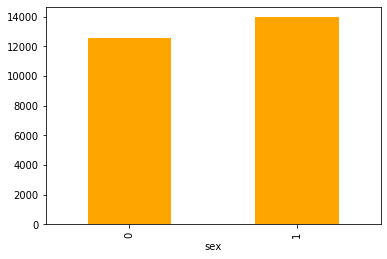

In [12]:
df.groupby('sex')['charges'].mean().plot.bar(color="orange")

In [13]:
df.groupby('region')['insuranceclaim'].mean()

region
0    0.592593
1    0.501538
2    0.673077
3    0.563077
Name: insuranceclaim, dtype: float64

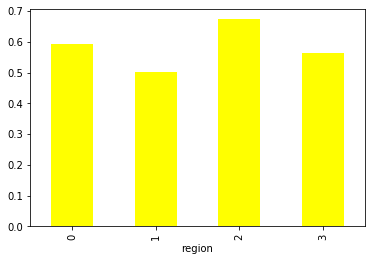

In [14]:
df.groupby('region')['insuranceclaim'].mean().plot.bar(color="yellow")

In [15]:
df['age'].value_counts()

18    69
19    68
51    29
45    29
46    29
47    29
48    29
50    29
52    29
20    29
26    28
54    28
53    28
25    28
24    28
49    28
23    28
22    28
21    28
27    28
28    28
31    27
29    27
30    27
41    27
43    27
44    27
40    27
42    27
57    26
34    26
33    26
32    26
56    26
55    26
59    25
58    25
39    25
38    25
35    25
36    25
37    25
63    23
60    23
61    23
62    23
64    22
Name: age, dtype: int64

In [16]:
df.corr()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000


In [17]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

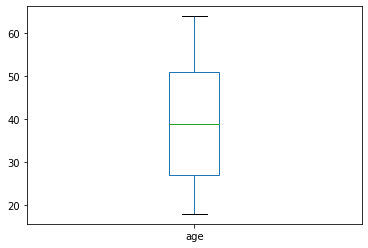

In [18]:
df['age'].plot.box()

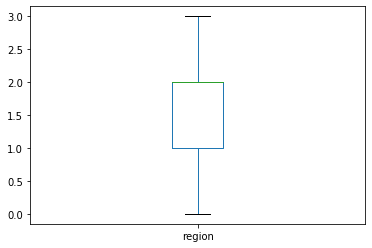

In [19]:
df['region'].plot.box()

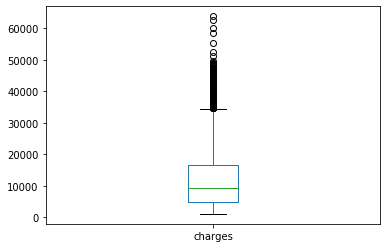

In [20]:
df['charges'].plot.box()

In [21]:
df.loc[df['charges']>25000,'charges']=np.mean(df['charges'])

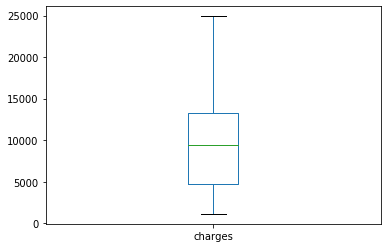

In [22]:
df['charges'].plot.box()

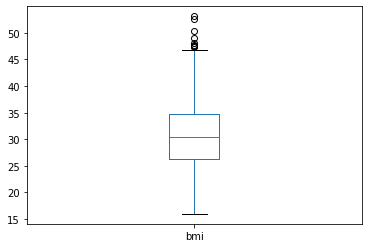

In [23]:
df['bmi'].plot.box()

In [24]:
#treating outliers
df.loc[df['bmi']>44,'bmi']=np.mean(df['bmi'])

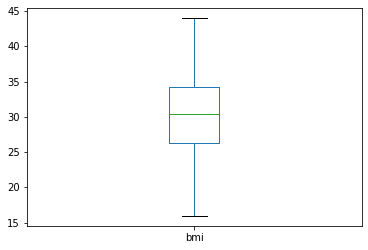

In [25]:
df['bmi'].plot.box()

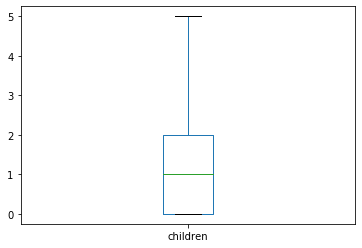

In [26]:
df['children'].plot.box()

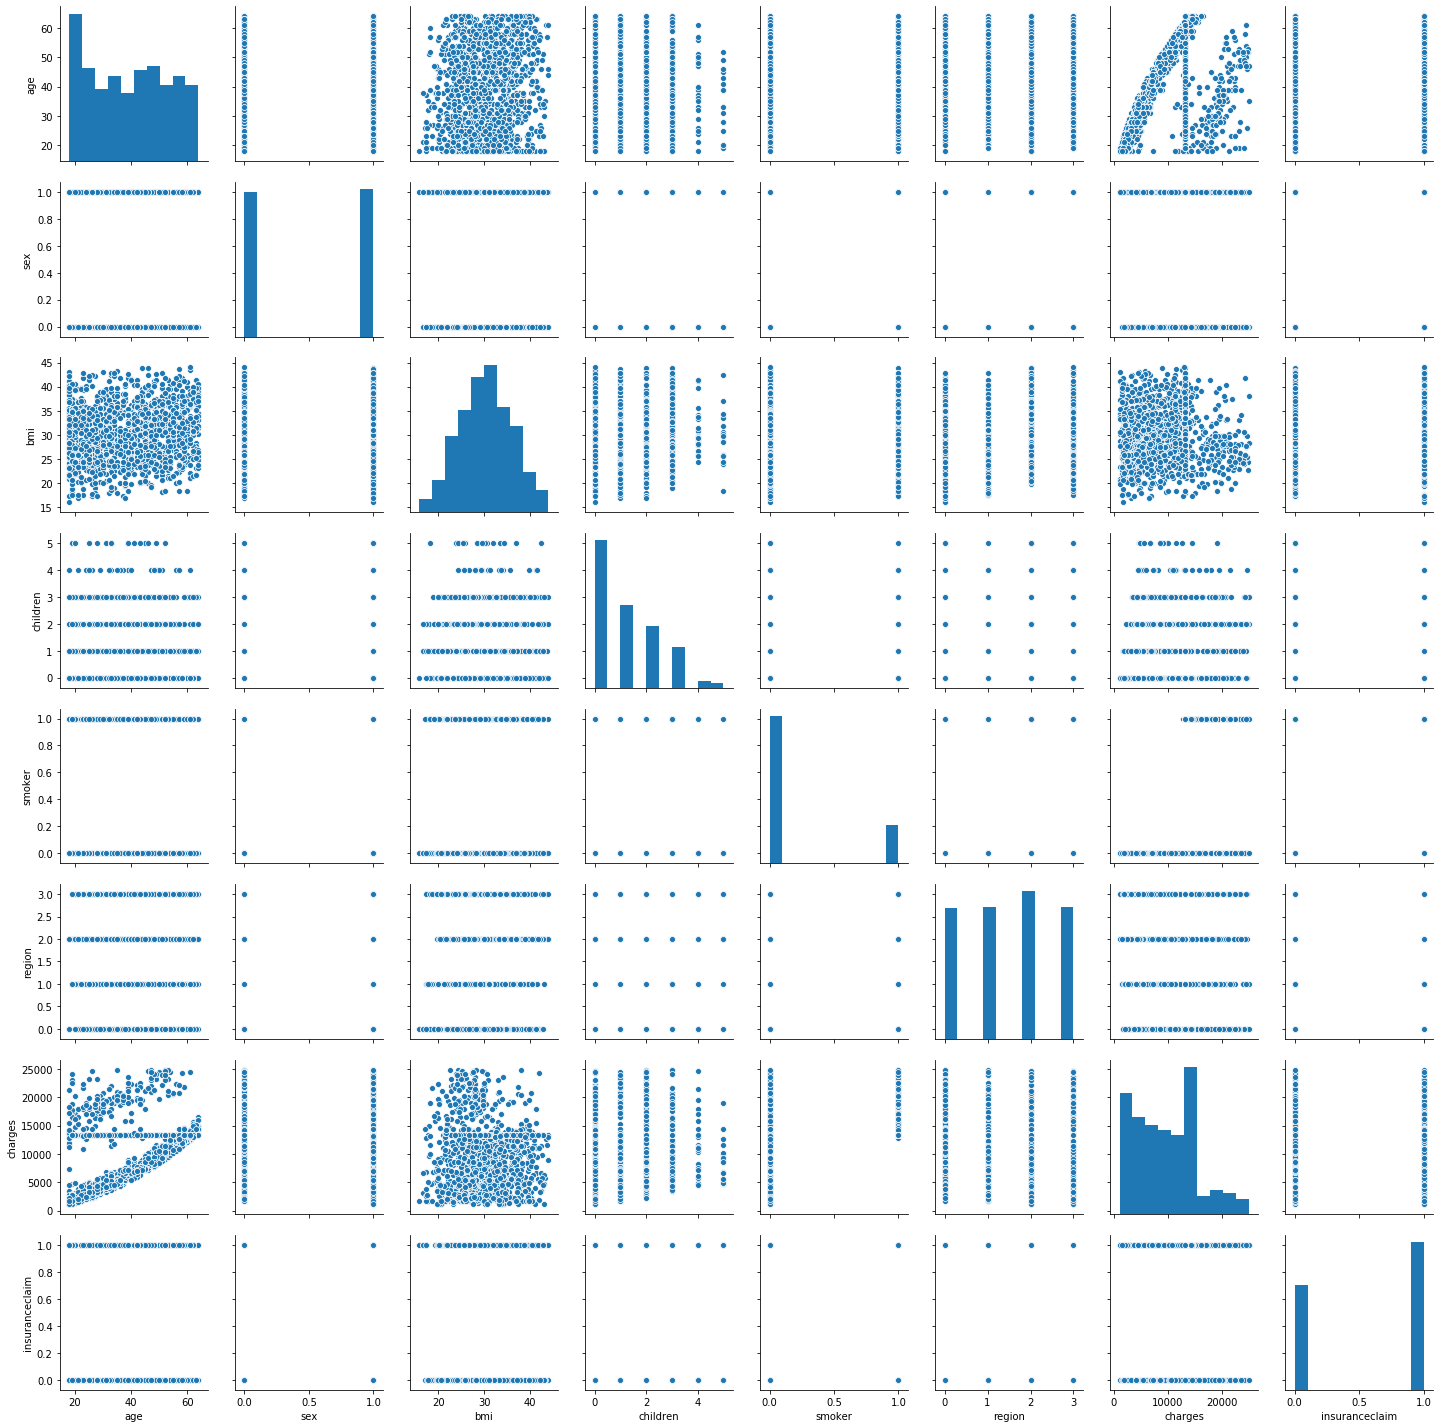

In [27]:
sns.pairplot(df)

In [28]:
df.drop('region', axis = 1)
x=df.iloc[:,0:-1]
x.shape


(1338, 7)

In [29]:
y=df.iloc[:,-1]

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=45)

In [31]:
lg=LogisticRegression()

In [32]:
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [34]:
predgnb=gnb.predict(x_test)
print(accuracy_score(predgnb,y_test))

0.8406779661016949


In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test)

In [36]:
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score)

[[129   7]
 [ 12 147]]
0.9355932203389831


In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix


knn=KNeighborsClassifier()
score=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
print('accuracy score:',score)
print('Mean Scores',score.mean())
print('Standard deviation',score.std())

y_pred=cross_val_predict(knn,x,y,cv=5)

print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

accuracy score: [0.64444444 0.68888889 0.67407407 0.57462687 0.67910448 0.63157895
 0.70676692 0.58646617 0.67669173 0.59398496]
Mean Scores 0.6456627472495501
Standard deviation 0.04462211600497665
Y Prediction values
[1 0 0 ... 1 1 1]


array([[287, 268],
       [202, 581]], dtype=int64)

In [38]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=250)
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.8542372881355932
[[111  25]
 [ 18 141]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       136
           1       0.85      0.89      0.87       159

    accuracy                           0.85       295
   macro avg       0.85      0.85      0.85       295
weighted avg       0.85      0.85      0.85       295



In [39]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    score=cross_val_score(svc,x,y,cv=7)

    print('Mean Scores',score.mean())
    print('Standard deviation',score.std())

    y_pred=cross_val_predict(svc,x,y,cv=5)


    conf_mat=confusion_matrix(y,y_pred)
    print(conf_mat)

In [40]:
svmkernel('rbf')

Mean Scores 0.6196253477279587
Standard deviation 0.021923346708695
[[ 61 494]
 [ 20 763]]


In [41]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso()
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.03657496928381565

In [42]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [43]:
y_pred_prob=lg.predict_proba(x_test)[:,1]

In [44]:
y_pred_prob

array([0.51158687, 0.31393461, 0.45897639, 0.843689  , 0.66185556,
       0.85358595, 0.42778917, 0.87216128, 0.65794029, 0.73454549,
       0.23763008, 0.63009967, 0.42645702, 0.58652113, 0.83305508,
       0.50896719, 0.69196074, 0.50262951, 0.6760495 , 0.83572484,
       0.48132491, 0.90630949, 0.88587389, 0.32222594, 0.82917578,
       0.51675615, 0.56409581, 0.74208726, 0.8072554 , 0.33612576,
       0.54936668, 0.8171538 , 0.63264485, 0.48985349, 0.11163302,
       0.55125183, 0.84439995, 0.83345667, 0.83235731, 0.18140912,
       0.90582949, 0.6736782 , 0.2592198 , 0.69414532, 0.86529815,
       0.52092528, 0.42849349, 0.78453325, 0.53400238, 0.77832631,
       0.01909877, 0.6515903 , 0.5484802 , 0.34129657, 0.54590863,
       0.89553735, 0.85578745, 0.68092652, 0.0940161 , 0.87193875,
       0.64016981, 0.75527242, 0.76527257, 0.70297729, 0.73236562,
       0.66375994, 0.86554189, 0.19882923, 0.63642645, 0.73698294,
       0.52539792, 0.84070642, 0.9703623 , 0.69515499, 0.96012

In [45]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [46]:
fpr

array([0.        , 0.        , 0.        , 0.00735294, 0.00735294,
       0.01470588, 0.01470588, 0.02205882, 0.02205882, 0.02941176,
       0.02941176, 0.03676471, 0.03676471, 0.08088235, 0.08088235,
       0.08823529, 0.08823529, 0.11764706, 0.11764706, 0.125     ,
       0.125     , 0.13235294, 0.13235294, 0.13970588, 0.13970588,
       0.14705882, 0.14705882, 0.15441176, 0.15441176, 0.16176471,
       0.16176471, 0.16911765, 0.16911765, 0.17647059, 0.17647059,
       0.20588235, 0.20588235, 0.21323529, 0.21323529, 0.24264706,
       0.24264706, 0.27205882, 0.27205882, 0.28676471, 0.28676471,
       0.30882353, 0.30882353, 0.32352941, 0.32352941, 0.375     ,
       0.375     , 0.41176471, 0.41176471, 0.44117647, 0.44117647,
       0.5       , 0.5       , 0.52205882, 0.52205882, 0.59558824,
       0.59558824, 0.625     , 0.625     , 0.63970588, 0.63970588,
       0.64705882, 0.64705882, 0.65441176, 0.65441176, 0.67647059,
       0.67647059, 0.70588235, 0.70588235, 0.875     , 0.875  

In [47]:
tpr

array([0.        , 0.00628931, 0.64779874, 0.64779874, 0.66037736,
       0.66037736, 0.66666667, 0.66666667, 0.68553459, 0.68553459,
       0.6918239 , 0.6918239 , 0.72327044, 0.72327044, 0.72955975,
       0.72955975, 0.73584906, 0.73584906, 0.75471698, 0.75471698,
       0.7672956 , 0.7672956 , 0.77358491, 0.77358491, 0.77987421,
       0.77987421, 0.78616352, 0.78616352, 0.79245283, 0.79245283,
       0.79874214, 0.79874214, 0.80503145, 0.80503145, 0.83018868,
       0.83018868, 0.8490566 , 0.8490566 , 0.86792453, 0.86792453,
       0.87421384, 0.87421384, 0.88679245, 0.88679245, 0.89308176,
       0.89308176, 0.89937107, 0.89937107, 0.90566038, 0.90566038,
       0.91194969, 0.91194969, 0.91823899, 0.91823899, 0.9245283 ,
       0.9245283 , 0.93081761, 0.93081761, 0.93710692, 0.93710692,
       0.94339623, 0.94339623, 0.94968553, 0.94968553, 0.96226415,
       0.96226415, 0.96855346, 0.96855346, 0.97484277, 0.97484277,
       0.98742138, 0.98742138, 0.99371069, 0.99371069, 1.     

In [48]:
thresholds

array([1.98423627, 0.98423627, 0.7485837 , 0.74555385, 0.74214844,
       0.74208726, 0.74183825, 0.7402762 , 0.73236562, 0.7290893 ,
       0.72361966, 0.72038333, 0.70410459, 0.69408293, 0.69396941,
       0.69358585, 0.69302978, 0.68345194, 0.6760495 , 0.6736782 ,
       0.66375994, 0.66202722, 0.66185556, 0.66036624, 0.65834764,
       0.65794029, 0.6515903 , 0.64812389, 0.64396224, 0.64016981,
       0.6392781 , 0.63642645, 0.63549674, 0.63363294, 0.63009967,
       0.61392631, 0.5827019 , 0.57796417, 0.56409581, 0.5484802 ,
       0.54590863, 0.54205346, 0.53507318, 0.52970718, 0.52877379,
       0.52092528, 0.51675615, 0.51087379, 0.5094239 , 0.48985349,
       0.48962528, 0.46669969, 0.45897639, 0.43263638, 0.43212729,
       0.37919234, 0.37696529, 0.3580755 , 0.35135016, 0.32882409,
       0.32464002, 0.3176616 , 0.31393461, 0.31078923, 0.30622168,
       0.30227556, 0.29883292, 0.28315243, 0.27853122, 0.26866506,
       0.2592198 , 0.2534901 , 0.25179184, 0.11576564, 0.11465

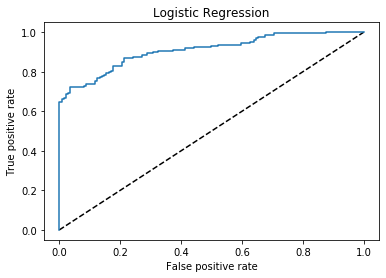

In [49]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

In [50]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))

In [51]:
print(auc_score)

0.7726831298557159


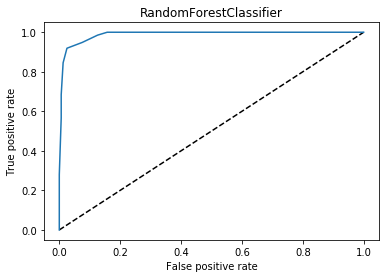

In [52]:
y_pred_prob=rf.predict_proba(x_test)[:,0]
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()


In [53]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test) 


In [54]:
#random forest classifier works best
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score)

[[132   4]
 [ 15 144]]
0.9355932203389831


In [56]:
from sklearn.externals import joblib
joblib.dump(rf,'rfinsurance')
rf_from_joblib=joblib.load('rfinsurance')
rf_from_joblib.predict(x_test)

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0], dtype=int64)